In [1]:
# Import dependecies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Creates Pandas DataFrame
inpatCharges_df =  pd.read_csv("inpatientCharges.csv")

In [3]:
# Selects improperly formatted column headers
columnNameList = list(inpatCharges_df.columns.values)
columnNameList[-4:-1]

[' Total Discharges ', ' Average Covered Charges ', ' Average Total Payments ']

In [4]:
columnNameList = list(inpatCharges_df.columns.values)
columnNameList[-4:-1]

[' Total Discharges ', ' Average Covered Charges ', ' Average Total Payments ']

In [5]:
# Renames the columns 
inpatCharges_df = inpatCharges_df.rename(columns = {columnNameList[-4]:"Total Discharges", columnNameList[-3]: "Average Covered Charges", columnNameList[-2]: "Average Total Payments"})

In [6]:
# Looks at the all the states 
inpatCharges_df['Provider State'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'TX', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM',
       'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [7]:
# Split DRG Definition column into two columns displaying number and the description
splitDRG = inpatCharges_df["DRG Definition"].str.split(" - ",1 , expand=True)
splitDRG = splitDRG.rename(columns={0: "DRG Number", 1: "DRG Description"}).reset_index(drop = True)
inpatCharges_df = pd.concat([inpatCharges_df,splitDRG], axis = 1)

In [8]:
# Total number of rows for each state
inpatCharges_df[['Provider State','DRG Definition']].groupby(['Provider State']).count().sort_values('DRG Definition', ascending=False).rename(columns={'DRG Definition':'Total_Numbers'})

,Total_Numbers
Provider State,
CA,13064
TX,11864
FL,11155
NY,9178
IL,7909
PA,7804
OH,7012
MI,5419
NC,5041


In [9]:
# Does the same as line above but less code
# Counts the number of charges by state
inpatCharges_df['Provider State'].value_counts()

CA    13064
TX    11864
FL    11155
NY     9178
IL     7909
PA     7804
OH     7012
MI     5419
NC     5041
GA     4968
NJ     4826
VA     4332
IN     4260
TN     4168
MO     4059
MA     3842
AL     3635
MD     3330
KY     3229
LA     3027
AZ     2851
SC     2847
WI     2834
WA     2778
OK     2520
MS     2410
MN     2252
AR     2067
CT     2011
CO     1890
IA     1734
KS     1638
WV     1589
OR     1299
NV     1202
NE     1062
NM      917
ME      888
NH      823
UT      732
RI      588
ID      551
MT      506
SD      486
DC      462
HI      442
ND      422
DE      394
VT      270
WY      247
AK      231
Name: Provider State, dtype: int64

In [10]:
# Creates a new dataframe for just state of texas
texasCharges = inpatCharges_df[inpatCharges_df["Provider State"]  == "TX"]
texasCharges.to_csv("DataSets/texasCharges.csv")
texasCharges

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,DRG Number,DRG Description
556,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450651,MEDICAL CENTER OF PLANO,3901 W 15TH ST,PLANO,TX,75075,TX - Dallas,14,$43531.42,$5994.00,$5111.42,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
880,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450661,ODESSA REGIONAL HOSPITAL,520 E 6TH STREET,ODESSA,TX,79761,TX - Odessa,13,$41376.61,$8073.07,$6862.84,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
912,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450007,PETERSON REGIONAL MEDICAL CENTER,551 HILL COUNTRY DRIVE,KERRVILLE,TX,78028,TX - San Antonio,13,$12991.76,$5992.00,$5044.00,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
913,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450010,UNITED REGIONAL HEALTH CARE SYSTEM,1600 11TH STREET,WICHITA FALLS,TX,76301,TX - Wichita Falls,76,$32020.86,$6967.42,$5286.17,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
914,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450011,ST JOSEPH REGIONAL HEALTH CENTER,2801 FRANCISCAN DR,BRYAN,TX,77802,TX - Bryan,67,$27721.61,$6322.89,$5243.49,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
915,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450023,CITIZENS MEDICAL CENTER,2701 HOSPITAL DRIVE,VICTORIA,TX,77901,TX - Victoria,20,$29503.50,$6383.25,$4024.90,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
916,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450029,LAREDO MEDICAL CENTER,1700 EAST SAUNDERS,LAREDO,TX,78044,TX - San Antonio,11,$81126.90,$7475.90,$6661.36,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
917,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450033,VHS HARLINGEN HOSPITAL COMPANY LLC,2101 PEASE ST,HARLINGEN,TX,78550,TX - Harlingen,15,$30502.20,$7365.86,$6462.40,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
918,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450034,CHRISTUS HOSPITAL,2830 CALDER AVENUE,BEAUMONT,TX,77702,TX - Beaumont,70,$28846.34,$5735.01,$4457.08,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
919,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450037,GOOD SHEPHERD MEDICAL CENTER,700 EAST MARSHALL AVENUE,LONGVIEW,TX,75601,TX - Longview,70,$17172.60,$5962.77,$5030.31,039,EXTRACRANIAL PROCEDURES W/O CC/MCC


In [11]:
# Counts rows by provider
texasCharges['Provider Name'].value_counts()

METHODIST HOSPITAL                                    100
BAPTIST MEDICAL CENTER                                100
MEMORIAL HERMANN HOSPITAL SYSTEM                       99
TEXAS HEALTH HARRIS METHODIST FORT WORTH               99
METHODIST HOSPITAL,THE                                 98
CLEAR LAKE REGIONAL MEDICAL CENTER                     98
EAST TEXAS MEDICAL CENTER                              97
ST DAVIDS MEDICAL CENTER                               97
MOTHER FRANCES HOSPITAL                                97
TEXAS HEALTH PRESBYTERIAN HOSPITAL  DALLAS             97
ST LUKES EPISCOPAL HOSPITAL                            97
COVENANT MEDICAL CENTER                                97
CHRISTUS SANTA ROSA HOSPITAL                           96
CHRISTUS SPOHN HOSPITAL CORPUS CHRISTI                 96
CHRISTUS HOSPITAL                                      96
BAPTIST ST ANTHONYS HEALTH SYSTEM-BAPTIST CAMPUS       96
SETON MEDICAL CENTER AUSTIN                            96
GOOD SHEPHERD 

In [12]:
# Only providers in city of Austin
atxCharges = texasCharges[texasCharges["Provider City"] == "AUSTIN"]

In [13]:
# Counts number of instances for each austin provider
atxCharges["Provider Name"].value_counts()

ST DAVIDS MEDICAL CENTER                     97
SETON MEDICAL CENTER AUSTIN                  96
ST DAVID'S SOUTH AUSTIN MEDICAL CENTER       91
NORTH AUSTIN MEDICAL CENTER                  84
UNIVERSITY MEDICAL CENTER AT BRACKENRIDGE    42
SETON  NORTHWEST HOSPITAL                    34
THE HOSPITAL AT WESTLAKE MEDICAL CENTER       5
NORTHWEST HILLS SURGICAL HOSPITAL             3
HEART HOSPITAL OF AUSTIN                      2
AUSTIN SURGICAL HOSPITAL                      1
SETON SOUTHWEST HOSPITAL                      1
Name: Provider Name, dtype: int64

In [14]:
atxCharges

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,DRG Number,DRG Description
925,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450056,SETON MEDICAL CENTER AUSTIN,1201 W 38TH ST,AUSTIN,TX,78705,TX - Austin,23,$49458.78,$6370.95,$5145.65,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
954,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450431,ST DAVIDS MEDICAL CENTER,919 E 32ND ST,AUSTIN,TX,78705,TX - Austin,24,$22755.75,$7680.29,$5485.20,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
974,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450713,ST DAVID'S SOUTH AUSTIN MEDICAL CENTER,901 WEST BEN WHITE BLVD,AUSTIN,TX,78704,TX - Austin,12,$23768.50,$5947.16,$5103.50,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
2149,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,450056,SETON MEDICAL CENTER AUSTIN,1201 W 38TH ST,AUSTIN,TX,78705,TX - Austin,26,$39889.84,$5925.34,$4485.23,057,DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC
2159,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,450124,UNIVERSITY MEDICAL CENTER AT BRACKENRIDGE,601 E 15TH STREET,AUSTIN,TX,78701,TX - Austin,17,$25881.94,$9580.58,$6266.47,057,DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC
2182,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,450431,ST DAVIDS MEDICAL CENTER,919 E 32ND ST,AUSTIN,TX,78705,TX - Austin,28,$23191.75,$6576.21,$5435.03,057,DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC
2200,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,450809,NORTH AUSTIN MEDICAL CENTER,12221 MOPAC EXPRESSWAY NORTH,AUSTIN,TX,78758,TX - Austin,11,$27094.00,$6187.09,$3886.72,057,DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC
2202,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,450867,SETON NORTHWEST HOSPITAL,11113 RESEARCH BOULEVARD,AUSTIN,TX,78759,TX - Austin,11,$45422.81,$7489.00,$6565.72,057,DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC
3721,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,450056,SETON MEDICAL CENTER AUSTIN,1201 W 38TH ST,AUSTIN,TX,78705,TX - Austin,51,$67794.29,$11283.03,$10577.88,064,INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION...
3731,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,450124,UNIVERSITY MEDICAL CENTER AT BRACKENRIDGE,601 E 15TH STREET,AUSTIN,TX,78701,TX - Austin,22,$79680.27,$16638.59,$15671.13,064,INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION...


In [15]:
# Only Providers in the city of Houston
htxCharges = texasCharges[texasCharges["Provider City"] == "HOUSTON"]
htxCharges = htxCharges.reset_index(drop = True)
#htxCharges.sort_values(by = ["Total Discharges"], ascending = False)

In [16]:
# Find which DRG had most total discharges
htxChargesDischarge = htxCharges.sort_values(by = ["Total Discharges"], ascending = False).groupby("DRG Definition").agg({'Total Discharges' : 'sum'})
htxChargesDischarge.sort_values(by = ['Total Discharges'], ascending = False).head(10)

,Total Discharges
DRG Definition,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,2917
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,2179
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,1518
292 - HEART FAILURE & SHOCK W CC,1394
291 - HEART FAILURE & SHOCK W MCC,1332
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",1170
683 - RENAL FAILURE W CC,1029
885 - PSYCHOSES,1008
682 - RENAL FAILURE W MCC,999


In [29]:
htxCharges.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,DRG Number,DRG Description
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450068,MEMORIAL HERMANN TEXAS MEDICAL CENTER,6411 FANNIN,HOUSTON,TX,77030,TX - Houston,16,$55184.00,$10011.31,$9097.62,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450184,MEMORIAL HERMANN HOSPITAL SYSTEM,1635 NORTH LOOP WEST,HOUSTON,TX,77008,TX - Houston,80,$30027.95,$7828.12,$5646.92,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450193,ST LUKES EPISCOPAL HOSPITAL,6720 BERTNER,HOUSTON,TX,77030,TX - Houston,59,$33762.69,$6781.59,$5565.08,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450358,"METHODIST HOSPITAL,THE",6565 FANNIN,HOUSTON,TX,77030,TX - Houston,31,$61366.38,$7172.54,$5897.83,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450610,MEMORIAL HERMANN MEMORIAL CITY MEDICAL CENTER,921 GESSNER,HOUSTON,TX,77024,TX - Houston,45,$27120.73,$6831.64,$4782.64,039,EXTRACRANIAL PROCEDURES W/O CC/MCC


In [61]:
htxCharges[htxCharges["DRG Number"] == "039"].sort_values(by = ["Total Discharges"], ascending = False)
htxCharge470 = htxCharges[htxCharges["DRG Number"] == "470"]
htxCharge470

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,DRG Number,DRG Description
618,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450035,ST JOSEPH MEDICAL CENTER,1401 ST. JOSEPH PARKWAY,HOUSTON,TX,77002,TX - Houston,46,$96129.95,$18984.15,$16707.34,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
619,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450068,MEMORIAL HERMANN TEXAS MEDICAL CENTER,6411 FANNIN,HOUSTON,TX,77030,TX - Houston,69,$75124.23,$21508.91,$17474.86,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
620,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450184,MEMORIAL HERMANN HOSPITAL SYSTEM,1635 NORTH LOOP WEST,HOUSTON,TX,77008,TX - Houston,649,$39874.14,$15555.96,$12483.56,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
621,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450193,ST LUKES EPISCOPAL HOSPITAL,6720 BERTNER,HOUSTON,TX,77030,TX - Houston,196,$60548.80,$18777.59,$10925.26,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
622,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450358,"METHODIST HOSPITAL,THE",6565 FANNIN,HOUSTON,TX,77030,TX - Houston,768,$52557.95,$14440.87,$12178.11,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
623,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450610,MEMORIAL HERMANN MEMORIAL CITY MEDICAL CENTER,921 GESSNER,HOUSTON,TX,77024,TX - Houston,282,$41668.29,$13029.62,$10439.52,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
624,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450638,HOUSTON NORTHWEST MEDICAL CENTER,710 FM 1960 WEST,HOUSTON,TX,77090,TX - Houston,107,$66622.56,$14850.95,$11442.05,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
625,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450644,WEST HOUSTON MEDICAL CENTER,12141 RICHMOND AVE,HOUSTON,TX,77082,TX - Houston,53,$80116.66,$14903.00,$13865.49,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
626,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450659,PARK PLAZA HOSPITAL,1313 HERMANN DR,HOUSTON,TX,77004,TX - Houston,64,$74548.34,$15752.95,$12586.70,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
627,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450716,CYPRESS FAIRBANKS MEDICAL CENTER,10655 STEEPLETOP DRIVE,HOUSTON,TX,77065,TX - Houston,13,$71353.07,$15204.30,$11947.61,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...


In [65]:
htxCharge470["Average Covered Charges"] = pd.to_numeric(htxCharge470.loc[:,"Average Covered Charges"].str[1:])

C:\Users\Nicholas Donahoe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
htxCharge470.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,DRG Number,DRG Description
618,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450035,ST JOSEPH MEDICAL CENTER,1401 ST. JOSEPH PARKWAY,HOUSTON,TX,77002,TX - Houston,46,96129.95,$18984.15,$16707.34,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
619,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450068,MEMORIAL HERMANN TEXAS MEDICAL CENTER,6411 FANNIN,HOUSTON,TX,77030,TX - Houston,69,75124.23,$21508.91,$17474.86,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
620,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450184,MEMORIAL HERMANN HOSPITAL SYSTEM,1635 NORTH LOOP WEST,HOUSTON,TX,77008,TX - Houston,649,39874.14,$15555.96,$12483.56,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
621,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450193,ST LUKES EPISCOPAL HOSPITAL,6720 BERTNER,HOUSTON,TX,77030,TX - Houston,196,60548.80,$18777.59,$10925.26,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
622,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450358,"METHODIST HOSPITAL,THE",6565 FANNIN,HOUSTON,TX,77030,TX - Houston,768,52557.95,$14440.87,$12178.11,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
623,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450610,MEMORIAL HERMANN MEMORIAL CITY MEDICAL CENTER,921 GESSNER,HOUSTON,TX,77024,TX - Houston,282,41668.29,$13029.62,$10439.52,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
624,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450638,HOUSTON NORTHWEST MEDICAL CENTER,710 FM 1960 WEST,HOUSTON,TX,77090,TX - Houston,107,66622.56,$14850.95,$11442.05,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
625,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450644,WEST HOUSTON MEDICAL CENTER,12141 RICHMOND AVE,HOUSTON,TX,77082,TX - Houston,53,80116.66,$14903.00,$13865.49,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
626,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450659,PARK PLAZA HOSPITAL,1313 HERMANN DR,HOUSTON,TX,77004,TX - Houston,64,74548.34,$15752.95,$12586.70,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
627,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450716,CYPRESS FAIRBANKS MEDICAL CENTER,10655 STEEPLETOP DRIVE,HOUSTON,TX,77065,TX - Houston,13,71353.07,$15204.30,$11947.61,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...


In [94]:
htxName470 = list(htxCharge470['Provider Name'])
htxAvgCC470 = list(htxCharge470['Average Covered Charges'])

<BarContainer object of 15 artists>

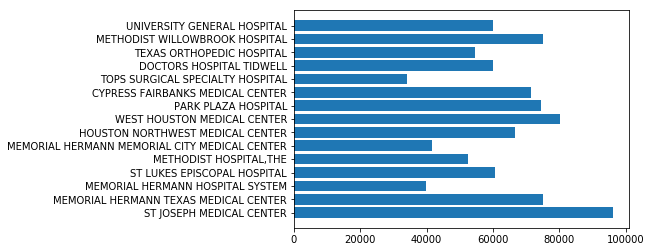

In [98]:
plt.barh(htxName470, htxAvgCC470)

In [87]:
htxCharges["Provider Name"].value_counts()

MEMORIAL HERMANN HOSPITAL SYSTEM                 99
METHODIST HOSPITAL,THE                           98
ST LUKES EPISCOPAL HOSPITAL                      97
HOUSTON NORTHWEST MEDICAL CENTER                 87
MEMORIAL HERMANN MEMORIAL CITY MEDICAL CENTER    87
MEMORIAL HERMANN TEXAS MEDICAL CENTER            83
METHODIST WILLOWBROOK HOSPITAL                   76
WEST HOUSTON MEDICAL CENTER                      58
ST JOSEPH MEDICAL CENTER                         46
HARRIS COUNTY HOSPITAL DISTRICT                  44
PARK PLAZA HOSPITAL                              43
CYPRESS FAIRBANKS MEDICAL CENTER                 36
DOCTORS HOSPITAL TIDWELL                         25
ST ANTHONY'S HOSPITAL                            11
UNIVERSITY GENERAL HOSPITAL                      11
ST LUKE'S HOSPITAL AT THE VINTAGE, LLC            6
TEXAS ORTHOPEDIC HOSPITAL                         4
TOPS SURGICAL SPECIALTY HOSPITAL                  3
RIVERSIDE GENERAL HOSPITAL                        2
METHODIST WE

In [22]:
sugaCharges = texasCharges[texasCharges["Provider City"] == "SUGAR LAND"]
sugaCharges

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,DRG Number,DRG Description
979,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,17,$36971.82,$6145.00,$4993.76,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
3803,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,41,$52537.90,$10502.34,$9707.90,064,INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION...
6017,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,47,$38042.14,$6621.91,$5644.78,065,INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION...
7870,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,30,$31210.90,$4616.20,$3528.33,066,INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION...
9811,069 - TRANSIENT ISCHEMIA,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,11,$29519.81,$4261.00,$3231.90,069,TRANSIENT ISCHEMIA
14786,176 - PULMONARY EMBOLISM W/O MCC,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,13,$38061.23,$6240.00,$5284.61,176,PULMONARY EMBOLISM W/O MCC
16660,177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,30,$55330.76,$11356.66,$10476.33,177,RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC
18614,178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,26,$48763.34,$7987.15,$7111.65,178,RESPIRATORY INFECTIONS & INFLAMMATIONS W CC
20687,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,31,$44038.67,$7513.83,$7116.32,189,PULMONARY EDEMA & RESPIRATORY FAILURE
20886,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,670053,ST LUKE'S SUGAR LAND HOSPITAL,1317 LAKE POINTE PARKWAY,SUGAR LAND,TX,77478,TX - Houston,11,$39468.45,$8963.36,$6072.54,189,PULMONARY EDEMA & RESPIRATORY FAILURE


In [23]:
sugaCharges['Provider Name'].value_counts()

METHODIST SUGAR LAND HOSPITAL           75
ST LUKE'S SUGAR LAND HOSPITAL           24
MEMORIAL HERMANN SUGAR LAND HOSPITAL    16
SUGAR LAND SURGICAL HOSPITAL LLP         1
Name: Provider Name, dtype: int64

In [24]:
methodistSuga = sugaCharges[sugaCharges["Provider Name"] == "METHODIST SUGAR LAND HOSPITAL"]
methodistSuga.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,DRG Number,DRG Description
979,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,17,$36971.82,$6145.00,$4993.76,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
3803,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,41,$52537.90,$10502.34,$9707.90,064,INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION...
6017,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,47,$38042.14,$6621.91,$5644.78,065,INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION...
7870,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,30,$31210.90,$4616.20,$3528.33,066,INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION...
9811,069 - TRANSIENT ISCHEMIA,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,11,$29519.81,$4261.00,$3231.90,069,TRANSIENT ISCHEMIA


In [25]:
#methodistSuga["Total Discharges"]
methodistSuga.sort_values(by = ["Total Discharges"], ascending = False)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,DRG Number,DRG Description
154774,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,202,$69016.18,$11439.85,$10646.96,871,SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W...
113712,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,117,$49296.82,$12357.55,$11114.30,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...
31316,193 - SIMPLE PNEUMONIA & PLEURISY W MCC,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,96,$45265.94,$8290.05,$7252.57,193,SIMPLE PNEUMONIA & PLEURISY W MCC
144373,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,85,$24939.48,$4611.05,$3542.85,690,KIDNEY & URINARY TRACT INFECTIONS W/O MCC
23356,190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,85,$42778.81,$6862.15,$6164.82,190,CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC
50972,252 - OTHER VASCULAR PROCEDURES W MCC,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,84,$93065.54,$18812.94,$17959.84,252,OTHER VASCULAR PROCEDURES W MCC
62793,291 - HEART FAILURE & SHOCK W MCC,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,82,$56242.39,$8723.26,$8045.97,291,HEART FAILURE & SHOCK W MCC
26094,191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,64,$34003.18,$5701.07,$4689.06,191,CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC
34288,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,60,$34540.31,$5968.96,$4771.53,194,SIMPLE PNEUMONIA & PLEURISY W CC
119803,491 - BACK & NECK PROC EXC SPINAL FUSION W/O C...,450820,METHODIST SUGAR LAND HOSPITAL,16655 SOUTHWEST FREEWAY,SUGAR LAND,TX,77479,TX - Houston,58,$33630.65,$6385.79,$4557.50,491,BACK & NECK PROC EXC SPINAL FUSION W/O CC/MCC
